In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from pyproj import Proj, transform
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import sklearn.linear_model as linreg
from sklearn.metrics import accuracy_score
import seaborn as sns
import datetime
import ast
from sklearn.linear_model import Lasso, Ridge
warnings.filterwarnings("ignore")
%matplotlib inline

In [285]:
# import necessary csv files - williamsburg
yelp_cumsum_rent_williamsburg_df = pd.read_csv('csv/yelp_cumsum_rent_williamsburg.csv', index_col = ['Unnamed: 0'])
yelp_cumsum_rent_williamsburg_df.index = pd.to_datetime(yelp_cumsum_rent_williamsburg_df.index)
yelp_williamsburg_cumsum_perc_inc_df = pd.read_csv('csv/yelp_cumsum_percent_inc_rent_williamsburg.csv', index_col = ['Unnamed: 0'])
yelp_williamsburg_cumsum_perc_inc_df.index = pd.to_datetime(yelp_williamsburg_cumsum_perc_inc_df.index)

# studio - rent
rent_studio = pd.read_csv('csv/Zip_MedianRentalPrice_Studio.csv')
zip_code_list = pd.read_csv('csv/zipcode_by_neighborhood.csv', index_col = 0)
zip_code_list['zipcodes'] = zip_code_list['zipcodes'].apply(lambda x: ast.literal_eval(x)) 

In [286]:
# import necessary csv files - bushwick
yelp_cumsum_rent_bushwick_df = pd.read_csv('csv/yelp_cumsum_rent_bushwick.csv', index_col = ['Unnamed: 0'])
yelp_cumsum_rent_bushwick_df.index = pd.to_datetime(yelp_cumsum_rent_bushwick_df.index)
yelp_bushwick_cumsum_perc_inc_df = pd.read_csv('csv/yelp_cumsum_percent_inc_rent_bushwick.csv', index_col = ['Unnamed: 0'])
yelp_bushwick_cumsum_perc_inc_df.index = pd.to_datetime(yelp_bushwick_cumsum_perc_inc_df.index)

In [287]:
# import necessary csv files - east harlem
yelp_cumsum_rent_east_harlem_df = pd.read_csv('csv/yelp_cumsum_rent_east_harlem.csv', index_col = ['Unnamed: 0'])
yelp_cumsum_rent_east_harlem_df.index = pd.to_datetime(yelp_cumsum_rent_east_harlem_df.index)
yelp_east_harlem_cumsum_perc_inc_df = pd.read_csv('csv/yelp_cumsum_percent_inc_rent_east_harlem.csv', index_col = ['Unnamed: 0'])
yelp_east_harlem_cumsum_perc_inc_df.index = pd.to_datetime(yelp_east_harlem_cumsum_perc_inc_df.index)

In [288]:
# import necessary csv files - east harlem
yelp_cumsum_rent_chelsea_clinton_df = pd.read_csv('csv/yelp_cumsum_rent_chelsea_clinton.csv', index_col = ['Unnamed: 0'])
yelp_cumsum_rent_chelsea_clinton_df.index = pd.to_datetime(yelp_cumsum_rent_chelsea_clinton_df.index)
yelp_chelsea_clinton_cumsum_perc_inc_df = pd.read_csv('csv/yelp_cumsum_percent_inc_rent_chelsea_clinton.csv', index_col = ['Unnamed: 0'])
yelp_chelsea_clinton_cumsum_perc_inc_df.index = pd.to_datetime(yelp_chelsea_clinton_cumsum_perc_inc_df.index)

In [289]:
yelp_bushwick_one_hot_category = pd.read_csv('bushwick_one_hot_cat.csv', index_col = 0)
yelp_williamsburg_one_hot_category = pd.read_csv('williamsburg_one_hot_category.csv', index_col = 'oldest_review')
yelp_chelsea_clinton_one_hot_category = pd.read_csv('chelsea_clinton_one_hot_category.csv', index_col = 0)
yelp_east_harlem_one_hot_category = pd.read_csv('east_harlem_one_hot_category.csv', index_col = 0)

In [290]:
williamsburg_zip_ = zip_code_list[zip_code_list['neighborhood'] == 'Williamsburg']
williamsburg_zip = williamsburg_zip_['zipcodes'].values[0]

In [291]:
williamsburg_zip_ = zip_code_list[zip_code_list['neighborhood'] == 'Williamsburg']
williamsburg_zip = williamsburg_zip_['zipcodes'].values[0]
# williamsburg_rent = get_rent_for_neighborhood(williamsburg_zip)

In [292]:
# bushwick
bushwick_zip_ = zip_code_list[zip_code_list['neighborhood'] == 'Bushwick']
bushwick_zip = bushwick_zip_['zipcodes'].values[0]

# east harlem
east_harlem_zip_ = zip_code_list[zip_code_list['neighborhood'] == 'East Harlem']
east_harlem_zip = east_harlem_zip_['zipcodes'].values[0]

# chelsea and clinton
chelsea_clinton_zip_ = zip_code_list[zip_code_list['neighborhood'] == 'Chelsea and Clinton']
chelsea_clinton_zip = chelsea_clinton_zip_['zipcodes'].values[0]

In [330]:
yelp_cumsum_rent_williamsburg_df['%increase_rent'] = 100*(yelp_cumsum_rent_williamsburg_df['rent'].pct_change())

In [331]:
yelp_cumsum_rent_east_harlem_df['%increase_rent'] = 100*(yelp_cumsum_rent_east_harlem_df['rent'].pct_change())
yelp_cumsum_rent_bushwick_df['%increase_rent'] = 100*(yelp_cumsum_rent_bushwick_df['rent'].pct_change())
yelp_cumsum_rent_chelsea_clinton_df['%increase_rent'] = 100*(yelp_cumsum_rent_chelsea_clinton_df['rent'].pct_change())

In [332]:
yelp_bushwick_one_hot_category = yelp_bushwick_one_hot_category[yelp_bushwick_one_hot_category.index > '2011-10']
yelp_williamsburg_one_hot_category = yelp_williamsburg_one_hot_category[yelp_williamsburg_one_hot_category.index > '2011-10']
yelp_chelsea_clinton_one_hot_category = yelp_chelsea_clinton_one_hot_category[yelp_chelsea_clinton_one_hot_category.index > '2011-10']
yelp_east_harlem_one_hot_category = yelp_east_harlem_one_hot_category[yelp_east_harlem_one_hot_category.index > '2011-10']

In [333]:
yelp_rent_per_inc_bushwick = pd.DataFrame(yelp_cumsum_rent_bushwick_df['%increase_rent'])
yelp_rent_per_inc_williamsburg = pd.DataFrame(yelp_cumsum_rent_williamsburg_df['%increase_rent'])
yelp_rent_per_inc_chelsea_clinton = pd.DataFrame(yelp_cumsum_rent_chelsea_clinton_df['%increase_rent'])
yelp_rent_per_inc_east_harlem = pd.DataFrame(yelp_cumsum_rent_east_harlem_df['%increase_rent'])

In [334]:
yelp_bushwick_one_hot_category.index = pd.to_datetime(yelp_bushwick_one_hot_category.index)

In [335]:
print(len(yelp_rent_per_inc_bushwick))
len(yelp_bushwick_one_hot_category)

82


82

In [336]:
yelp_bushwick_one_hot_category= yelp_bushwick_one_hot_category.drop(['%increase_rent'], axis = 1)
yelp_williamsburg_one_hot_category = yelp_williamsburg_one_hot_category.drop(['%increase_rent'], axis = 1)
yelp_chelsea_clinton_one_hot_category = yelp_chelsea_clinton_one_hot_category.drop(['%increase_rent'], axis = 1)
yelp_east_harlem_one_hot_category = yelp_east_harlem_one_hot_category.drop(['%increase_rent'], axis = 1)

In [337]:
yelp_bushwick_one_hot_category = yelp_bushwick_one_hot_category.join(yelp_rent_per_inc_bushwick, how='outer')
yelp_williamsburg_one_hot_category = yelp_williamsburg_one_hot_category.join(yelp_rent_per_inc_williamsburg, how='outer')
yelp_chelsea_clinton_one_hot_category = yelp_chelsea_clinton_one_hot_category.join(yelp_rent_per_inc_chelsea_clinton, how='outer')
yelp_east_harlem_one_hot_category = yelp_east_harlem_one_hot_category.join(yelp_rent_per_inc_east_harlem, how='outer')

In [338]:
yelp_east_harlem_one_hot_category = yelp_east_harlem_one_hot_category[yelp_east_harlem_one_hot_category.index<'2018-09']
yelp_williamsburg_one_hot_category = yelp_williamsburg_one_hot_category[yelp_williamsburg_one_hot_category.index<'2018-09']
yelp_chelsea_clinton_one_hot_category = yelp_chelsea_clinton_one_hot_category[yelp_chelsea_clinton_one_hot_category.index<'2018-09']
yelp_bushwick_one_hot_category = yelp_bushwick_one_hot_category[yelp_bushwick_one_hot_category.index<'2018-09']

In [341]:
# plt.scatter(yelp_williamsburg_one_hot_category['category_bars'], yelp_williamsburg_one_hot_category['%increase_rent'])

In [342]:
df_cumsum_perc_inc = yelp_williamsburg_one_hot_category.append(yelp_east_harlem_one_hot_category).append(yelp_chelsea_clinton_one_hot_category).append(yelp_bushwick_one_hot_category)
df_cumsum_perc_inc = df_cumsum_perc_inc.reset_index(drop = True)

In [133]:
df = yelp_east_harlem_cumsum_perc_inc_df.append(yelp_bushwick_cumsum_perc_inc_df).append(yelp_east_harlem_cumsum_perc_inc_df).append(yelp_chelsea_clinton_cumsum_perc_inc_df)
# pd.concat([yelp_east_harlem_cumsum_perc_inc_df, yelp_bushwick_cumsum_perc_inc_df, yelp_east_harlem_cumsum_perc_inc_df], axis=0).reset_index()
df = df.reset_index(drop = True)

In [147]:
df_rest_count_perc_inc = yelp_cumsum_rent_williamsburg_df.append(yelp_cumsum_rent_east_harlem_df).append(yelp_cumsum_rent_bushwick_df).append(yelp_cumsum_rent_chelsea_clinton_df)
df_rest_count_perc_inc = df_rest_count_perc_inc.reset_index(drop = True)

In [356]:
df_cumsum_perc_inc = df_cumsum_perc_inc[~df_cumsum_perc_inc['category_bars'].isnull()]

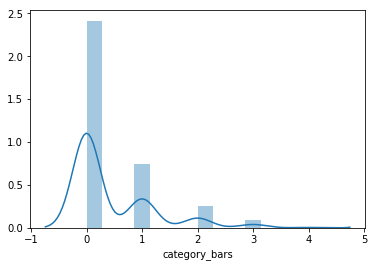

In [358]:
sns.distplot(df_cumsum_perc_inc['category_bars'])

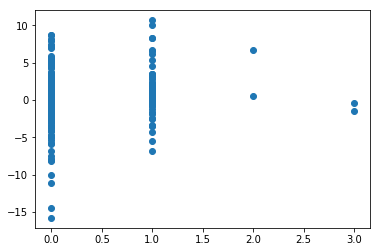

In [357]:
plt.scatter(df_cumsum_perc_inc['category_chinese'], df_cumsum_perc_inc['%increase_rent'])

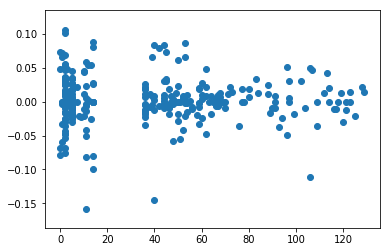

In [152]:
plt.scatter(df_rest_count_perc_inc['category_bars'], df_rest_count_perc_inc['%increase_rent'])

In [135]:
df['rent'] = df['rent'].replace([np.inf, -np.inf], np.nan)

In [136]:
df = df.dropna(subset = ['rent'])

In [137]:
df = df.replace([np.inf, -np.inf], np.nan)

In [138]:
df = df.reset_index(drop= True)

In [ ]:
df

In [141]:
plt.plot(yelp_cumsum_rent_chelsea_clinton_df['']

SyntaxError: unexpected EOF while parsing (<ipython-input-141-fef75a736f56>, line 1)

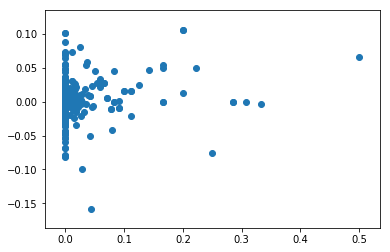

In [143]:
plt.scatter(df['category_coffee'], df['rent'])

In [362]:
from scipy import stats
category_coffee_boxcox = stats.boxcox(df['category_coffee']+1)

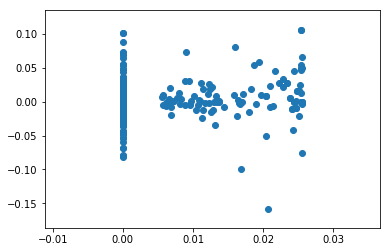

In [369]:
plt.scatter(category_coffee_boxcox[0], df['rent'])

In [114]:
df.loc[:,'category_african':'category_wine_bars'] =  df.loc[:,'category_african':'category_wine_bars']*100

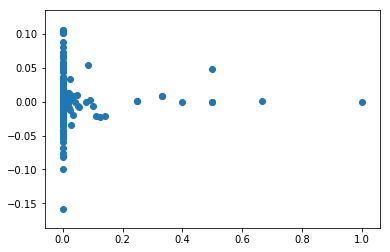

In [144]:
plt.scatter(df['category_bars'], df['rent'])

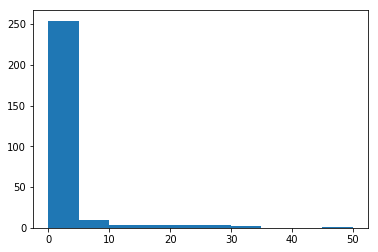

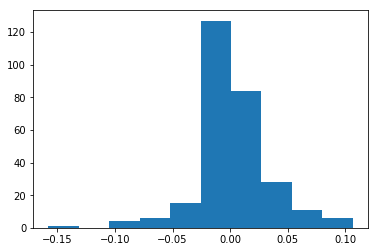

In [116]:
f1 = plt.figure()
f2 = plt.figure()
ax1 = f1.add_subplot(111)
ax1.hist(df['category_coffee'])
ax2 = f2.add_subplot(111)
ax2.hist(df['rent'])
plt.show()

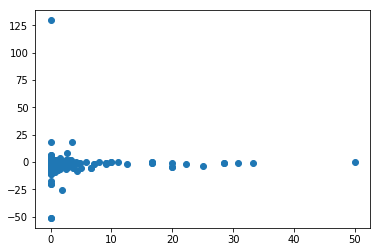

In [117]:
plt.scatter(df['category_coffee'], df['%increase_rent'])